# Packages to Import

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import torch
import nltk
import matplotlib.pyplot as plt
import os
import sqlite3

# Load and Analyse data

In [2]:
#os.chdir('..')
#os.getcwd()

In [3]:
def load_csv(direc, fname):
    for di in direc:
        os.chdir(di)
    
    data = pd.read_csv(fname)
    print("Data from ", fname, " is loaded!")
    
    for di in direc:
        os.chdir('..')
        
    return data

In [4]:
data_csv = load_csv(['tweets_sentiment'], 'Tweets.csv')

Data from  Tweets.csv  is loaded!


In [5]:
def load_sql(direc, fname):
    for di in direc:
        os.chdir(di)
    
    conn = sqlite3.connect(fname)
    cur = conn.cursor()
    
    tables = cur.execute("select name from sqlite_master where type = 'table'").fetchall()
    # tables are in a list of tuple pairs, so select first table and first element of tuple
    query = "select * from " + tables[0][0] + ";"
    df = pd.read_sql_query(query, conn)
    print("Data from ", fname, " is loaded!")
    
    cur.close()
    conn.close()
    
    for di in direc:
        os.chdir('..')
        
    return df

In [6]:
data_sql = load_sql(['tweets_sentiment'], 'database.sqlite')

Data from  database.sqlite  is loaded!


In [7]:
def describe_pd(df):
    print("Shape of data: ", df.shape, "\n")
    print("Features in the dataframe: ", df.columns.values, "\n")
    print("Description of the dataframe: ", df.info(), "\n")
    print("Top 5 rows in the dataframe: ", df.head(), "\n")

In [8]:
describe_pd(data_csv)

Shape of data:  (14640, 15) 

Features in the dataframe:  ['tweet_id' 'airline_sentiment' 'airline_sentiment_confidence'
 'negativereason' 'negativereason_confidence' 'airline'
 'airline_sentiment_gold' 'name' 'negativereason_gold' 'retweet_count'
 'text' 'tweet_coord' 'tweet_created' 'tweet_location' 'user_timezone'] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
tweet_id                        14640 non-null int64
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         14640 non-null object
airline_sentiment_gold          40 non-null object
name                            14640 non-null object
negativereason_gold             32 non-null object
retweet_count                   14640 non-null int64
text                            1464

In [9]:
describe_pd(data_sql)

Shape of data:  (14485, 15) 

Features in the dataframe:  ['tweet_id' 'airline_sentiment' 'airline_sentiment_confidence'
 'negativereason' 'negativereason_confidence' 'airline'
 'airline_sentiment_gold' 'name' 'negativereason_gold' 'retweet_count'
 'text' 'tweet_coord' 'tweet_created' 'tweet_location' 'user_timezone'] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14485 entries, 0 to 14484
Data columns (total 15 columns):
tweet_id                        14485 non-null int64
airline_sentiment               14485 non-null object
airline_sentiment_confidence    14485 non-null float64
negativereason                  14485 non-null object
negativereason_confidence       14485 non-null object
airline                         14485 non-null object
airline_sentiment_gold          14485 non-null object
name                            14485 non-null object
negativereason_gold             14485 non-null object
retweet_count                   14485 non-null int64
text                          

In [10]:
def combine_df(dflist):
    data = pd.concat(dflist, ignore_index=True)
    print(data.shape)
    return data

In [11]:
data = combine_df([data_csv, data_sql])

(29125, 15)


Meta data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29125 entries, 0 to 29124
Data columns (total 15 columns):
tweet_id                        29125 non-null int64
airline_sentiment               29125 non-null object
airline_sentiment_confidence    29125 non-null float64
negativereason                  23663 non-null object
negativereason_confidence       25007 non-null object
airline                         29125 non-null object
airline_sentiment_gold          14525 non-null object
name                            29125 non-null object
negativereason_gold             14517 non-null object
retweet_count                   29125 non-null int64
text                            29125 non-null object
tweet_coord                     15504 non-null object
tweet_created                   29125 non-null object
tweet_location                  24392 non-null object
user_timezone                   24305 non-null object
dtypes: float64(1), int64(2), object(12)
memory usage: 3.3+ MB
None
Da

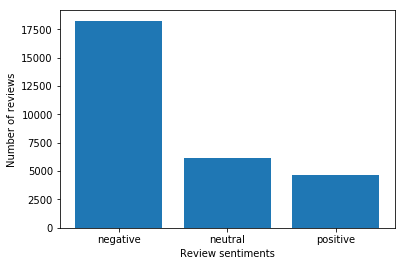

First 5 rows of data: 


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [12]:
print("Meta data: ")
print(data.info())

print("Data per class: ")
print(data['airline_sentiment'].value_counts())

sentiment_count = data.groupby('airline_sentiment').count()
plt.bar(sentiment_count.index.values, sentiment_count['text'])
plt.xlabel('Review sentiments')
plt.ylabel('Number of reviews')
plt.show()

print("First 5 rows of data: ")
data.head()

In [13]:
data.columns.values

array(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'], dtype=object)

In [14]:
chdata = data.copy()
chdata = chdata.drop(['tweet_id', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold', 'retweet_count', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'], axis=1)
chdata.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...



Sentence Tokenization:  ['@VirginAmerica What @dhepburn said.'] 

Word Tokenization:  ['@', 'VirginAmerica', 'What', '@', 'dhepburn', 'said', '.'] 

Frequency:  <FreqDist with 6 samples and 7 outcomes>
[('@', 2), ('VirginAmerica', 1)]


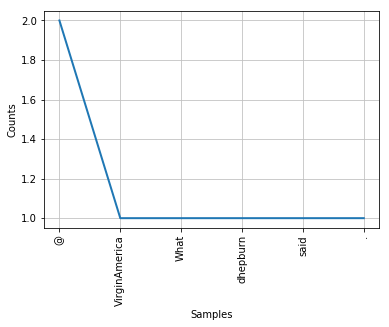

In [15]:
# taking a sample of the text to perform analysis
text = chdata.iloc[0, 1]
print()

# sentence tokenization of text
sentence = nltk.tokenize.sent_tokenize(text)
print("Sentence Tokenization: ", sentence, "\n")

# word tokenization of text
word = nltk.tokenize.word_tokenize(text)
print("Word Tokenization: ", word, "\n")

# frequency distribution
fdist = nltk.probability.FreqDist(word)
print("Frequency: ", fdist)
print(fdist.most_common(2))

# plotting the word frequency
fdist.plot(30, cumulative=False)

First 10 Stop words:  ['m', 'shan', 'after', 'ourselves', "couldn't", 'once', "aren't", "wouldn't", 'too', 'when']
Before stoppers:  ['@', 'VirginAmerica', 'What', '@', 'dhepburn', 'said', '.']
After removing stoppers:  ['@', 'VirginAmerica', 'What', '@', 'dhepburn', 'said', '.']
Plotting after removing stop words:


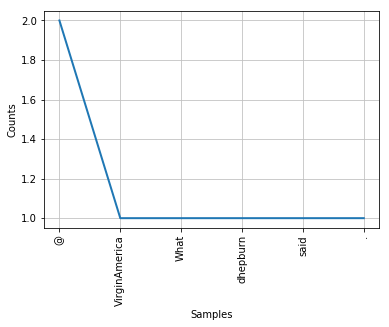

After performing stemmings:  ['@', 'virginamerica', 'what', '@', 'dhepburn', 'said', '.']
After performing lemmatization:  ['@', 'virginamerica', 'what', '@', 'dhepburn', 'said', '.']
The resulting POS tagging:
[('@', 'NN'), ('VirginAmerica', 'NNP'), ('What', 'WP'), ('@', 'NNP'), ('dhepburn', 'NN'), ('said', 'VBD'), ('.', '.')]


In [16]:
stopper = list(set(nltk.corpus.stopwords.words("english")))
print("First 10 Stop words: ", stopper[:10])

filtered = []

for w in word:
    if w not in stopper:
        filtered.append(w)

print("Before stoppers: ", word)
print("After removing stoppers: ", filtered)

after_stem = nltk.probability.FreqDist(filtered)
print("Plotting after removing stop words:")
after_stem.plot(30, cumulative=False)

# performing text normalization
# stemming
ps = nltk.stem.PorterStemmer()

stemmed = []
for w in filtered:
    stemmed.append(ps.stem(w))

print("After performing stemmings: ", stemmed)

# lemmatization - a dictionary look up
lem = nltk.stem.wordnet.WordNetLemmatizer()

lemmaed = []
for w in stemmed:
    lemmaed.append(lem.lemmatize(w))

print("After performing lemmatization: ", lemmaed)

# applying pos tagging
postag = nltk.pos_tag(nltk.word_tokenize(text))
print("The resulting POS tagging:")
print(postag)

In [17]:
lem.lemmatize(text)

'@VirginAmerica What @dhepburn said.'

# Reducing the corpus size

In [18]:
# function to collect the word corpus in the 
def collect_words(df, feature):
    total = []
    for f in df[feature]:
        wordlis = nltk.tokenize.word_tokenize(f)
        
        for st in wordlis:
            if len(st) > 1:
                total.append(st)
            
    return total

corpus = collect_words(chdata, 'text')
len(corpus)

502875

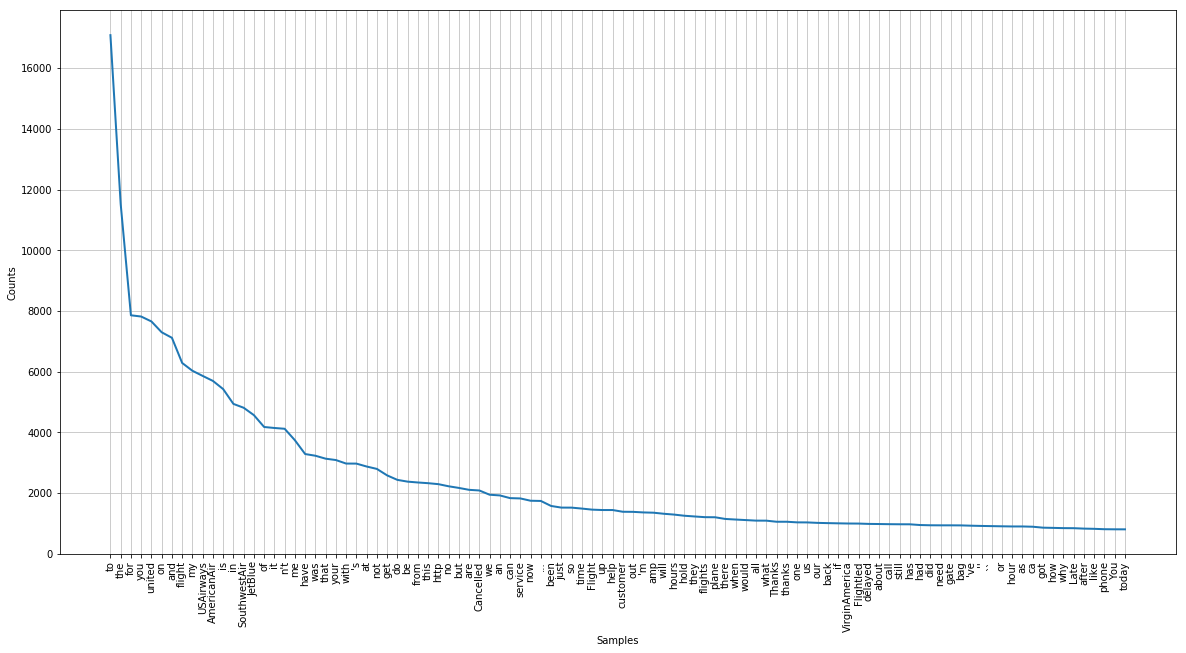

In [19]:
corpus_freq = nltk.probability.FreqDist(corpus)
plt.figure(figsize=(20, 10))
corpus_freq.plot(100, cumulative=False)

In [20]:
'''
def collect_common(freqd, thresh_above):
    after1 = freqd.copy()
    
    for key in freqd.keys():
        if freqd[key] < thresh_above:
            del(after1[key])
            
    return after1

# the newly obtained keys will then be used for further filtering
over_top = collect_common(corpus_freq, 10000)

len(over_top.keys())
'''

'\ndef collect_common(freqd, thresh_above):\n    after1 = freqd.copy()\n    \n    for key in freqd.keys():\n        if freqd[key] < thresh_above:\n            del(after1[key])\n            \n    return after1\n\n# the newly obtained keys will then be used for further filtering\nover_top = collect_common(corpus_freq, 10000)\n\nlen(over_top.keys())\n'

In [21]:
def clean_text(df, feature):
    
    fin = []
    all_words = []
    
    for f in df[feature]:
        cl = []
        wordlis = nltk.tokenize.word_tokenize(f)
        
        # performing lemmatization and stop words removal
        for st in wordlis:
            if len(st) > 1:
                # collect all the words
                all_words.append(st)
                # collect words that are filtered
                cl.append(st)
                
        fin.append(cl)
    
    return fin, all_words

cleaned, full = clean_text(chdata, 'text')
len(cleaned), len(full), len(set(full))

(29125, 502875, 19706)

In [22]:
cleaned[0]

['VirginAmerica', 'What', 'dhepburn', 'said']

In [23]:
chdata['cleaned'] = cleaned
chdata.head()

,airline_sentiment,text,cleaned
0,neutral,@VirginAmerica What @dhepburn said.,"[VirginAmerica, What, dhepburn, said]"
1,positive,@VirginAmerica plus you've added commercials t...,"[VirginAmerica, plus, you, 've, added, commerc..."
2,neutral,@VirginAmerica I didn't today... Must mean I n...,"[VirginAmerica, did, n't, today, ..., Must, me..."
3,negative,@VirginAmerica it's really aggressive to blast...,"[VirginAmerica, it, 's, really, aggressive, to..."
4,negative,@VirginAmerica and it's a really big bad thing...,"[VirginAmerica, and, it, 's, really, big, bad,..."


# Feature Engineering

In [24]:
len(set(corpus_freq.keys())), len(set(full))

(19706, 19706)

In [25]:
def binary_encoding(corpus):
    encoding = dict()
    bitsize = 0
    
    for i in range(1000):
        length = i ** 2
        if length > len(list(corpus.keys())):
            bitsize = i
            print(bitsize)
            break
            
    for num, key in enumerate(corpus.keys()):
        init = np.zeros(bitsize).reshape(-1, 1)
        binval = np.array([str(b) for b in bin(num + 1)[2:]]).reshape(-1, 1)
        #print(init[-(len(binval)):].shape, binval.shape)
        init[-(len(binval)):] = binval
        encoding[key] = init
        
    return encoding

bin_en = binary_encoding(corpus_freq)

141


In [98]:
bin_en['Golds.']

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [99]:
# testing if all the words have an encoding
for i in list(set(corpus_freq.keys())):
    if i in corpus_freq.keys():
        continue
    else:
        print(i)

# Word2Vec (CBOW) Embedding Model

In [100]:
def wordvec(encoding, gram=3):
    
    input_size = encoding[list(encoding.keys())[0]].shape[0] * (gram - 1)
    hidden_sizes = [input_size * 2]
    output_size = encoding[list(encoding.keys())[0]].shape[0]
    
    # Build a feed-forward network
    model = torch.nn.Sequential(torch.nn.Linear(input_size, hidden_sizes[0]),
                          torch.nn.ReLU(),
                          torch.nn.Linear(hidden_sizes[0], output_size),
                          torch.nn.Sigmoid())
    
    print("Model Parameters:")
    print(model)
    
    return model

In [101]:
chdata.head()

,airline_sentiment,text,cleaned
0,neutral,@VirginAmerica What @dhepburn said.,"[VirginAmerica, What, dhepburn, said]"
1,positive,@VirginAmerica plus you've added commercials t...,"[VirginAmerica, plus, you, 've, added, commerc..."
2,neutral,@VirginAmerica I didn't today... Must mean I n...,"[VirginAmerica, did, n't, today, ..., Must, me..."
3,negative,@VirginAmerica it's really aggressive to blast...,"[VirginAmerica, it, 's, really, aggressive, to..."
4,negative,@VirginAmerica and it's a really big bad thing...,"[VirginAmerica, and, it, 's, really, big, bad,..."


In [102]:
def batched(sentences, encoding, gram=3):
    
    for s in sentences:
        
        i = 0
        for word in range(3, len(s)+1):
            coding = []
            values = s[i:word]
            i += 1
            
            for w in values:
                code = encoding[w]
                coding.append(code)
                
            yield coding

In [103]:
#for i in batched(chdata['cleaned'], bin_en):
    #print(i, len(i))

In [110]:
def run_wordvec(model, values, encode):
    
    epochs = 100
    #stop_counter = 0
    #early_stop = 100
    learning_rate = 1e-3
    #every = 10
    #threshold = 50.0
    #stoc = 1000
    train_log, valid_log = [], []
    
    loss_fn = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    for t in range(1, epochs + 1):
        train_iter, valid_iter = [], []
        train_score, valid_score = 0, 0
        idx = np.random.randint(99, 110)
        store = []
        
        for num, batch in enumerate(batched(values, encode)):
            
            out_idx = int(np.floor(len(batch) / 2))
            inp1 = torch.tensor(batch[out_idx - 1], dtype=torch.float).reshape(1, -1)
            inp2 = torch.tensor(batch[out_idx + 1], dtype=torch.float).reshape(1, -1)
            inp = torch.cat([inp1, inp2], dim=1)
            out = torch.tensor(batch[out_idx], dtype=torch.float).reshape(1, -1)
            #print(inp.shape, out.shape)
            
            #####set the model to train mode
            if num % idx != 0:
                model.train()
                
                # forward pass
                pred = model(inp)
                # compute and print loss
                loss = loss_fn(pred, out)
                # collect the loss
                train_iter.append(loss.item())
                
                # backward pass
                loss.backward()
        
                # optimizer makes an update to its parameters
                optimizer.step()
                
                # zero the gradient before back prop
                optimizer.zero_grad()
            
            #####set the model to eval mode
            else:
                model.eval()
                
                # forward pass
                pred = model(inp)
                # compute and print loss
                loss = loss_fn(pred, out)
                # collect the loss
                valid_iter.append(loss.item())

            
        train_score = sum(train_iter)/len(train_iter)
        valid_score = sum(valid_iter)/len(valid_iter)
        train_log.append(train_score)
        valid_log.append(valid_score)
        print("Epoch ", t, (t / epochs) * 100, "% complete...")
        print("Train loss: ", train_score, "Validation score: ", valid_score)
        print("\n")
                            
    print("Plotting the training and validation losses:")
    plt.figure(figsize=(15, 5))
    plt.title("Training vs Validation plot")
    p1, = plt.plot(train_log, label="Train loss")
    p2, = plt.plot(valid_log, label="Valid loss")
    plt.legend(handles=[p1, p2])
    plt.show()
    
    return model

In [107]:
# already trained!
#m1_init_word = wordvec(bin_en)
#m1_trai_word = run_wordvec(m1_init_word, chdata['cleaned'], bin_en)

In [112]:
m2_init_word = wordvec(bin_en)
m2_100iter_word = run_wordvec(m2_init_word, chdata['cleaned'], bin_en)

Model Parameters:
Sequential(
  (0): Linear(in_features=282, out_features=564, bias=True)
  (1): ReLU()
  (2): Linear(in_features=564, out_features=141, bias=True)
  (3): Sigmoid()
)
Epoch  1 1.0 % complete...
Train loss:  0.01929986368331393 Validation score:  0.01941832307247228


Epoch  2 2.0 % complete...
Train loss:  0.01917178584845617 Validation score:  0.019256813617370087


Epoch  3 3.0 % complete...
Train loss:  0.01918923027053674 Validation score:  0.019225570643441905


Epoch  4 4.0 % complete...
Train loss:  0.0192154608296652 Validation score:  0.019259292859124692


Epoch  5 5.0 % complete...
Train loss:  0.019223657984416494 Validation score:  0.019286906715321614


Epoch  6 6.0 % complete...
Train loss:  0.019222265516922406 Validation score:  0.0192508079176288


Epoch  7 7.000000000000001 % complete...
Train loss:  0.0192526288238337 Validation score:  0.019247982960478527


Epoch  8 8.0 % complete...
Train loss:  0.01925691990875182 Validation score:  0.01900387101

KeyboardInterrupt: 

# Saving and Applying the Embedding

In [34]:
def saving(model, loc):
    torch.save(model, loc)
    return

In [35]:
def loading(model, loc):
    # model must be initialised with same class as saved
    model = torch.load(loc)
    return model

In [114]:
saving(m2_init_word, 'tweets_sentiment/m1_64part_word')

In [37]:
#m11_init_word = wordvec(bin_en)
#m11_trai_word = loading(m11_init_word, 'tweets_sentiment/m1_trai_word')
#m11_trai_word.state_dict().keys()

Model Parameters:
Sequential(
  (0): Linear(in_features=282, out_features=564, bias=True)
  (1): ReLU()
  (2): Linear(in_features=564, out_features=141, bias=True)
  (3): Sigmoid()
)


odict_keys(['0.weight', '0.bias', '2.weight', '2.bias'])

In [115]:
m22_init_word = wordvec(bin_en)
m22_trai_word = loading(m22_init_word, 'tweets_sentiment/m1_64part_word')
m22_trai_word.state_dict().keys()

Model Parameters:
Sequential(
  (0): Linear(in_features=282, out_features=564, bias=True)
  (1): ReLU()
  (2): Linear(in_features=564, out_features=141, bias=True)
  (3): Sigmoid()
)


odict_keys(['0.weight', '0.bias', '2.weight', '2.bias'])

In [116]:
def embedding(model, encoding):
    embed = dict()
    wt = np.transpose(model.state_dict()['2.weight'].detach().numpy())
    for i in encoding.keys():
        val = np.dot(wt, encoding[i])
        embed[i] = val
        
    return embed

In [118]:
word_m1en = embedding(m22_trai_word, bin_en)
del(word_m1en['VirginAmerica'])
len(word_m1en.keys())

19705

In [119]:
word_m1en.keys()

dict_keys(['What', 'dhepburn', 'said', 'plus', 'you', "'ve", 'added', 'commercials', 'to', 'the', 'experience', '...', 'tacky', 'did', "n't", 'today', 'Must', 'mean', 'need', 'take', 'another', 'trip', 'it', "'s", 'really', 'aggressive', 'blast', 'obnoxious', '``', 'entertainment', "''", 'in', 'your', 'guests', 'faces', 'amp', 'they', 'have', 'little', 'recourse', 'and', 'big', 'bad', 'thing', 'about', 'seriously', 'would', 'pay', '30', 'flight', 'for', 'seats', 'that', 'this', 'playing', 'only', 'flying', 'VA', 'yes', 'nearly', 'every', 'time', 'fly', 'VX', 'ear', 'worm', 'won', 'go', 'away', 'Really', 'missed', 'prime', 'opportunity', 'Men', 'Without', 'Hats', 'parody', 'there', 'https', '//t.co/mWpG7grEZP', 'virginamerica', 'Well', "didn't…but", 'NOW', 'DO', '-D', 'was', 'amazing', 'arrived', 'an', 'hour', 'early', 'You', "'re", 'too', 'good', 'me', 'know', 'suicide', 'is', 'second', 'leading', 'cause', 'of', 'death', 'among', 'teens', '10-24', 'lt', 'pretty', 'graphics', 'so', 'muc

In [120]:
def score(en, v1, v2):
    a, b = en[v1], en[v2]
    sc = a - b
    
    s = abs(sum(sc))
    m = abs(np.mean(sc))
    c = np.dot(a.T, b) / (np.linalg.norm(a.T) * np.linalg.norm(b))
    a = np.arccos(c)
    
    print("Word 1: ", v1, " Word 2: ", v2)
    print("Sum score: ", s[0])
    print("Mean score: ", m)
    print("Cos score: ", c[0][0])
    print("Angle score: ", a[0][0])

In [104]:
score(word_m1en, 'little', 'large')

Word 1:  little  Word 2:  large
Sum score:  0.37267090007662773
Mean score:  0.0006607640072280633
Cos score:  0.6774348578168652
Angle score:  0.8265265414168432


In [126]:
score(word_m1en, 'little', 'large')

Word 1:  little  Word 2:  large
Sum score:  2783.71572126995
Mean score:  4.93566617246445
Cos score:  0.6919659408556749
Angle score:  0.8065876421563254


In [106]:
score(word_m1en, 'big', 'large') #success

Word 1:  big  Word 2:  large
Sum score:  0.555789340287447
Mean score:  0.0009854420927082393
Cos score:  0.77832890291628
Angle score:  0.6787965078577078


In [123]:
score(word_m1en, 'big', 'large')

Word 1:  big  Word 2:  large
Sum score:  2758.003045534039
Mean score:  4.890076321868863
Cos score:  0.8076808744071436
Angle score:  0.6305881307994896


In [107]:
score(word_m1en, '604', 'large') #success

Word 1:  604  Word 2:  large
Sum score:  0.6639841087162495
Mean score:  0.0011772767885039883
Cos score:  -0.08554845242118371
Angle score:  1.6564494726376786


In [128]:
score(word_m1en, '604', 'large') #success

Word 1:  604  Word 2:  large
Sum score:  107.46506804176852
Mean score:  0.1905409007832775
Cos score:  0.6545578404241481
Angle score:  0.8571987124418162


In [80]:
def topsim(en, term, top=10):
    a = en[term]
    fin = []
    
    # calculating all the similarities
    for i in en.keys():
        if i == term:
            continue
        b = en[i]
        cosine = np.dot(a.T, b) / (np.linalg.norm(a).T * np.linalg.norm(b))
        angle = np.arccos(cosine[0][0]) * 180 / 3.14
        tup = (i, angle)
        fin.append(tup)
        
    # sorting angles in ascending
    for i in range(len(fin)):
        for j in range(i, len(fin)):
            if fin[i][1] > fin[j][1]:
                temp = fin[i]
                fin[i] = fin[j]
                fin[j] = temp
                
    for i in range(top):
        print(i+1, " : ", fin[i])
                
    #return fin

In [48]:
0, 30, 45, 60, 90

(0, 30, 45, 60, 90)

In [90]:
print("Cosine: ", np.cos([1, 0, -1]))
print("Inverse Cosine (rad): ", np.arccos([1, 0, -1]))
print("Inverse Cosine (deg): ", (np.arccos([1, 0, -1]) / 3.14) * 180)
print("Inverse Cosine (r90): ", ((np.arccos([1, 0, -1]) / 3.14) * 180) - 90)

Cosine:  [0.54030231 1.         0.54030231]
Inverse Cosine (rad):  [0.         1.57079633 3.14159265]
Inverse Cosine (deg):  [  0.          90.04564931 180.09129861]
Inverse Cosine (r90):  [-9.00000000e+01  4.56493067e-02  9.00912986e+01]


In [44]:
1, np.sqrt(3)/2, 1/np.sqrt(2), 1/2, 0

(1, 0.8660254037844386, 0.7071067811865475, 0.5, 0)

In [86]:
topsim(word_m1en, 'large', 100)

1  :  ('response', 21.18647678190303)
2  :  ('Glad', 21.41188035584553)
3  :  ('8-10', 21.613715915968918)
4  :  ('Alright', 21.747497971117443)
5  :  ('769', 22.063084796226725)
6  :  ('who', 22.377970721696343)
7  :  ('forward', 22.799899535744967)
8  :  ('professionalism', 22.837924006193997)
9  :  ('are', 22.925725919215232)
10  :  ('two', 23.566804533328526)
11  :  ('http', 23.88266189770861)
12  :  ('sit', 24.12279907649079)
13  :  ('last', 24.34712938564421)
14  :  ('due', 24.445023454689473)
15  :  ('seriously', 24.58044502383968)
16  :  ('RECEIPT', 27.79043764861043)
17  :  ('string', 28.596283269066983)
18  :  ('adult', 28.85126315736019)
19  :  ('beat', 28.871507364832976)
20  :  ('allowance', 28.9000899788949)
21  :  ('Jfk', 29.093596491662986)
22  :  ('wonderful', 29.19175737153598)
23  :  ('barbados', 29.262054400592966)
24  :  ('punished', 29.28219298830232)
25  :  ('already', 29.282578899615594)
26  :  ('TGIF', 29.355495482884727)
27  :  ('11/13/2012', 29.36595085362635

In [122]:
topsim(word_m1en, 'large', 100)

1  :  ('professionalism', 8.714528070451346)
2  :  ('response', 12.730449833812607)
3  :  ('innovation', 13.676574675514567)
4  :  ('29DaysToGo', 13.718539929206841)
5  :  ('//t.co/Cm4roIypc2', 14.022822644731779)
6  :  ('posted', 14.578178459267352)
7  :  ('769', 15.086901131294828)
8  :  ('who', 15.094522794264034)
9  :  ('plane', 15.142683135881411)
10  :  ('travelled', 15.633736286839468)
11  :  ('Glad', 15.788060711873722)
12  :  ('two', 16.1441724790982)
13  :  ('TGIF', 16.2640783171232)
14  :  ('Alright', 16.30844697287405)
15  :  ('pretty', 16.30925128181247)
16  :  ('from', 16.331799686353822)
17  :  ('delightful', 16.407885600484157)
18  :  ('myVXexperience', 16.47478606723989)
19  :  ('are', 16.497028694137484)
20  :  ('250k', 16.582422923856033)
21  :  ('8-10', 16.83771928689472)
22  :  ('forward', 16.922729774119485)
23  :  ('http', 16.995051160265028)
24  :  ('JWA', 17.08010291725296)
25  :  ('choice', 17.115109117167993)
26  :  ('sit', 17.210534215683026)
27  :  ('reativ

In [87]:
topsim(word_m1en, 'big', 100)

1  :  ('among', 25.876426468109734)
2  :  ('person', 26.103593015152637)
3  :  ('TY', 26.466451003352308)
4  :  ('11PM', 26.820900775724358)
5  :  ('seriously', 27.029914507752196)
6  :  ('hours', 27.45954808753277)
7  :  ('Who', 27.607668154792613)
8  :  ('sit', 27.625774850443893)
9  :  ('floors', 27.839471340111)
10  :  ('VA', 28.267012872259254)
11  :  ('intelligence', 28.553971307874026)
12  :  ('and', 30.496167458729676)
13  :  ('the', 30.908863668411502)
14  :  ('guests', 31.55303480467763)
15  :  ('recourse', 31.695899566488855)
16  :  ('More', 33.4170123733402)
17  :  ('folks', 33.904773315849134)
18  :  ('transfer', 34.166739277501556)
19  :  ('guy', 34.25058526881314)
20  :  ('Tnx', 34.25791937428673)
21  :  ('4:36', 34.445699534286604)
22  :  ('myVXexperience', 34.48279366575079)
23  :  ('weeks', 34.577323088691834)
24  :  ('exposed', 34.70674508742982)
25  :  ('pretty', 34.70677902226536)
26  :  ('header.elevateUser.numOfPointsAvailable', 34.72208787966176)
27  :  ('suppor

In [88]:
topsim(word_m1en, 'small', 100)

1  :  ('destinations', 23.232779990515798)
2  :  ('ottawa', 23.48683912790114)
3  :  ('sld', 23.573379027086084)
4  :  ('embossed', 23.574211678553887)
5  :  ('payments', 23.604716287859993)
6  :  ('complain', 23.679458850066585)
7  :  ('carry', 24.05601247447221)
8  :  ('Left', 24.51753875242772)
9  :  ('representative', 24.533192193639614)
10  :  ('worstcustomerserviceever', 24.563473838860855)
11  :  ('job', 26.450389625884416)
12  :  ('purchase', 26.55406886454398)
13  :  ('When', 26.636089903580668)
14  :  ('ws', 26.899664943472754)
15  :  ('looks', 27.01183015820531)
16  :  ('meat', 30.84428763445798)
17  :  ('A319', 30.91062051662797)
18  :  ('frequency', 30.934936707169577)
19  :  ('goal', 30.98028383776987)
20  :  ('matters', 31.02667392781554)
21  :  ('tiday', 31.150333468498353)
22  :  ('FtMyers', 31.15989475298963)
23  :  ('Spread', 31.17437823648189)
24  :  ('tweet', 31.207808068002723)
25  :  ('pls', 31.332755493475187)
26  :  ('ton', 31.347922146477195)
27  :  ('knack', 

In [89]:
topsim(word_m1en, 'little', 100)

1  :  ('started', 34.034681392643265)
2  :  ('cause', 34.20496784493173)
3  :  ('2/23', 35.38355504396434)
4  :  ('erased', 35.707253503672064)
5  :  ('bad', 35.870882702529045)
6  :  ('week', 35.883222653474114)
7  :  ('Booking', 35.97804277056959)
8  :  ('and', 36.15997155423727)
9  :  ('recourse', 36.328530238125225)
10  :  ('playing', 36.802227543208346)
11  :  ('stranded', 36.94521907411822)
12  :  ('40', 37.11072906300338)
13  :  ('ew', 37.67816995426513)
14  :  ('economy', 42.495067039441196)
15  :  ('sign', 42.618383628888694)
16  :  ('make/change', 43.02276399499228)
17  :  ('//t.co/pXEXIlSjBs', 43.23419135524006)
18  :  ('program', 43.37990056980343)
19  :  ('seated', 43.547756783091494)
20  :  ('sprinted', 43.81789108266923)
21  :  ('book', 43.94824881805721)
22  :  ('scolding', 44.12733707339193)
23  :  ('PSP', 44.144932841978026)
24  :  ('touched', 44.14842575639582)
25  :  ('uncontrollably', 44.174710544728036)
26  :  ('teens', 44.230627656748)
27  :  ('received', 44.2847